<div align='left'><font size="6" color="#FFA500">[LAB 03] Khai Thác Dữ Liệu - Sự tương đồng và các khoảng cách (TT) </font></div>

> Sinh viên: Nguyễn Công Hoài Nam <br>
  Mã số sinh viên: 21280099

### Minimum Edit Distance

In [1]:
def find_minimum_edit_distance(source_string, target_string):

    # Create a dp matrix of dimension (source_string + 1) x (destination_matrix + 1)
    dp = [[0] * (len(source_string) + 1) for i in range(len(target_string) + 1)]

    # Initialize the required values of the matrix
    for i in range(1, len(target_string) + 1) :
        dp[i][0] = dp[i - 1][0] + 1
    for i in range(1, len(source_string) + 1) :
        dp[0][i] = dp[0][i - 1] + 1

    # Maintain the record of opertions done
    # Record is one tuple. Eg : (INSERT, 'a') or (SUBSTITUTE, 'e', 'r') or (DELETE, 'j')
    operations_performed = []

    # Build the matrix following the algorithm
    for i in range(1, len(target_string) + 1) :
        for j in range(1, len(source_string) + 1) :
            if source_string[j - 1] == target_string[i - 1] :
                dp[i][j] = dp[i - 1][j - 1]
            else :
                dp[i][j] =  min(dp[i - 1][j] + 1, \
                                dp[i - 1][j - 1] + 2, \
                                dp[i][j - 1] + 1)

    # Initialization for backtracking
    i = len(target_string)
    j = len(source_string)

    # Backtrack to record the operation performed
    while (i != 0 and j != 0) :
        # If the character of the source string is equal to the character of the destination string,
        # no operation is performed
        if target_string[i - 1] == source_string[j - 1] :
            i -= 1
            j -= 1
        else :
            # Check if the current element is derived from the upper-left diagonal element
            if dp[i][j] == dp[i - 1][j - 1] + 2 :
                operations_performed.append(('SUBSTITUTE', source_string[j - 1], target_string[i - 1]))
                i -= 1
                j -= 1
            # Check if the current element is derived from the upper element
            elif dp[i][j] == dp[i - 1][j] + 1 :
                operations_performed.append(('INSERT', target_string[i - 1]))
                i -= 1
            # Check if the current element is derived from the left element
            else :
                operations_performed.append(('DELETE', source_string[j - 1]))
                j -= 1

    # If we reach top-most row of the matrix
    while (j != 0) :
        operations_performed.append(('DELETE', source_string[j - 1]))
        j -= 1

    # If we reach left-most column of the matrix
    while (i != 0) :
        operations_performed.append(('INSERT', target_string[i - 1]))
        i -= 1

    # Reverse the list of operations performed as we have operations in reverse
    # order because of backtracking
    operations_performed.reverse()
    return [dp[len(target_string)][len(source_string)], operations_performed]

In [2]:
# Get the source and target string
source_string = "INTENTION"
target_string = "EXECUTION"

# Find the minimum edit distance and the operation performed
distance, operations_performed = find_minimum_edit_distance(source_string, target_string)

# Count the number of individual operations
insertions, deletions, substitutions = 0, 0, 0
for i in operations_performed :
    if i[0] == 'INSERT' :
        insertions += 1
    elif i[0] == 'DELETE' :
        deletions += 1
    else :
        substitutions += 1

# Print the results
print("Minimum edit distance : {}".format(distance))
print("Number of insertions : {}".format(insertions))
print("Number of deletions : {}".format(deletions))
print("Number of substitutions : {}".format(substitutions))
print("Total number of operations : {}".format(insertions + deletions + substitutions))

print("Actual Operations :")
for i in range(len(operations_performed)) :

    if operations_performed[i][0] == 'INSERT' :
        print("{}) {} : {}".format(i + 1, operations_performed[i][0], operations_performed[i][1]))
    elif operations_performed[i][0] == 'DELETE' :
        print("{}) {} : {}".format(i + 1, operations_performed[i][0], operations_performed[i][1]))
    else :
        print("{}) {} : {} by {}".format(i + 1, operations_performed[i][0], operations_performed[i][1], operations_performed[i][2]))

Minimum edit distance : 8
Number of insertions : 1
Number of deletions : 1
Number of substitutions : 3
Total number of operations : 5
Actual Operations :
1) DELETE : I
2) SUBSTITUTE : N by E
3) SUBSTITUTE : T by X
4) INSERT : C
5) SUBSTITUTE : N by U


### Longest Common Subsequence

In [3]:
def find_longest_common_subsequence(source_string, target_string):
    # Độ dài của source_string
    m = len(source_string)
    # Độ dài của target_string
    n = len(target_string)
    # Tạo ma trận dp có kích thước (m+1)x(n+1) với các giá trị ban đầu bằng 0
    dp = [[0]*(n + 1) for i in range(m + 1)]
    # Khởi tạo dãy con chung dài nhất ban đầu là rỗng
    subsequence = ''

    # Dùng thuật toán lập bảng độ dài của dãy con chung dài nhất (LCS)
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if source_string[i - 1] == target_string[j - 1]:
                # Nếu hai kí tự cuối của hai chuỗi bằng nhau thì tăng độ dài của LCS lên 1
                dp[i][j] = dp[i - 1][j - 1]+1
            else:
                # Ngược lại, lấy giá trị lớn nhất của LCS từ hai trường hợp trước đó
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    # Xác định LCS bằng cách lần ngược lại bảng dp
    i = m
    j = n
    path = []
    while i != 0 and j != 0:
        if source_string[i-1] == target_string[j-1]:
            # Nếu hai kí tự cuối của hai chuỗi bằng nhau, thêm kí tự này vào LCS
            subsequence += source_string[i-1]
            path.append(('MATCH',[i,j]))
            i -= 1
            j -= 1
        elif dp[i][j-1] == dp[i-1][j] + 1:
            # Nếu giá trị bên trái của dp lớn hơn giá trị bên trên, giảm chỉ số cột
            path.append(('UNMATCH',[i,j]))
            j -= 1

        else:
            # Ngược lại, giảm chỉ số hàng
            path.append(('UNMATCH',[i,j]))
            i -= 1

    path.append(('UNMATCH',[i,j]))
    path.reverse()

    # Trả về độ dài của LCS và LCS đó
    return dp[m][n], subsequence[::-1], dp, path

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def show_result_lcss(dp, path, source_string, target_string):
    dp = np.array(dp)

    plt.figure(figsize=(16, 9))

    cmap = ListedColormap('cadetblue')

    plt.imshow(dp, cmap=cmap)  

    for i in range(dp.shape[0]):
        for j in range(dp.shape[1]):
            plt.text(j, i, str(dp[i, j]), ha='center', va='center', color='black')

    for action, coord in path:
        color = 'yellow' if action == 'MATCH' else 'brown'
        plt.scatter(coord[1], coord[0], color=color, edgecolors='black', s=400)
 

    for i in range(len(path)-1):
        x1, y1 = path[i][1][0], path[i][1][1]
        x2, y2 = path[i+1][1][0], path[i+1][1][1]
        plt.arrow(y1, x1, y2-y1, x2-x1, ec='brown')


    x_labels = ['#']
    for char in target_string:
        x_labels.append(char)
    plt.gca().xaxis.tick_top()

    plt.xticks(np.arange(len(x_labels)), x_labels)
    y_labels = ['#']
    for char in source_string:
        y_labels.append(char)
    plt.yticks(np.arange(len(y_labels)), y_labels)

    plt.show()


In [5]:
# Get the source and target string
source_string = "ACADB"
target_string = "CBDA"

# Find the minimum edit distance and the operation performed
distance, subsequence, dp, path = find_longest_common_subsequence(source_string, target_string)
print("LCSS: ", subsequence)
print("Độ dài:", distance)

LCSS:  CA
Độ dài: 2


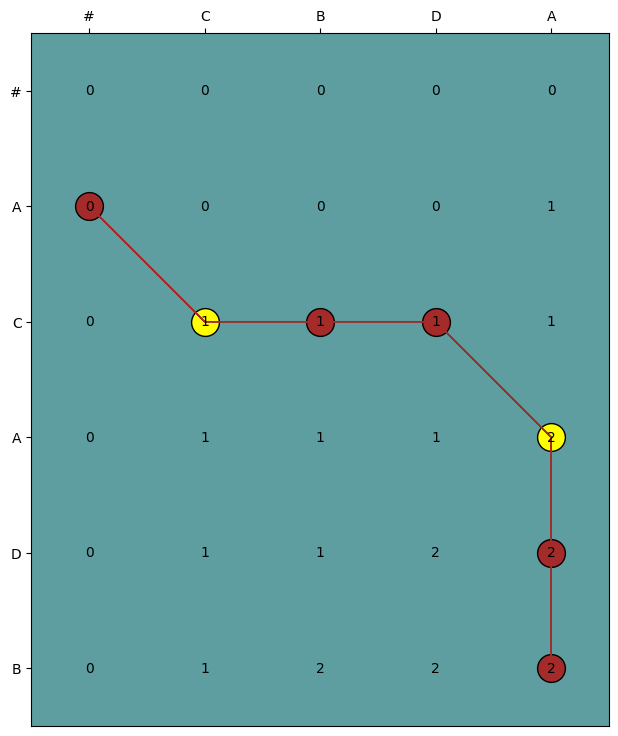

In [6]:
show_result_lcss(dp, path, source_string, target_string)

### Dynamic Time Warping

In [7]:
def find_DTW(series_1, series_2):
    # Lấy độ dài của chuỗi thứ nhất và chuỗi thứ hai
    m = len(series_1)
    n = len(series_2)
    # Trường hợp nếu một trong 2 chuỗi rỗng
    if m == 0 or n == 0:
        return [],[]
    # Khởi tạo mảng dp với tất cả giá trị ban đầu bằng 0
    dp = [[0]*n for i in range(m)]
    
    dp[0][0]=abs(series_1[0] - series_2[0])
    # Tính toán các giá trị cho hàng đầu tiên và cột đầu tiên của dp
    # dựa trên giá trị tuyệt đối của sự khác biệt giữa các phần tử trong hai chuỗi
    for i in range(1, m):
        dp[i][0] = abs(series_1[i]-series_2[0])+dp[i-1][0]
    for i in range(1, n):
        dp[0][i] = abs(series_2[i]-series_1[0])+dp[0][i-1]

    # Tính toán giá trị cho các phần tử còn lại của dp
    for i in range(1, m):
        for j in range(1, n):
            dp[i][j] = abs(series_1[i]-series_2[j]) + \
                min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    
    # Đảo ngược ma trận dp để thuận tiện cho việc tìm đường đi nhỏ nhất
    dp = dp[::-1]

    # Tìm đường đi nhỏ nhất thông qua ma trận dp và lưu vào mảng dtw_path
    i = 0
    j = n-1
    dtw_path = [(i, j)]
    while i != m-1 and j != 0:
        if dp[i+1][j-1] == min(dp[i+1][j], dp[i][j-1], dp[i+1][j-1]):
            dtw_path.append((i+1, j-1))
            i += 1
            j -= 1
        elif dp[i+1][j] == min(dp[i+1][j], dp[i][j-1], dp[i+1][j-1]):
            dtw_path.append((i+1, j))
            i += 1
        else:
            dtw_path.append((i, j-1))
            j -= 1

    # Thêm điểm cuối cùng vào mảng dtw_path
    dtw_path.append((m-1, 0))
    return dp, dtw_path

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def show_result_dtw(dp, path, series_1, series_2):
    dp = np.array(dp)

    plt.figure(figsize=(16, 9))

    cmap = ListedColormap('cadetblue')

    plt.imshow(dp, cmap=cmap)  

    for coord in path:
        plt.scatter(coord[1], coord[0], color='yellow', edgecolors = 'black', s=400) 

    for i in range(len(path)-1):
        plt.arrow(path[i][1], path[i][0], path[i+1][1]-path[i][1], path[i+1][0]-path[i][0], ec='brown')

    for i in range(dp.shape[0]):
        for j in range(dp.shape[1]):
            plt.text(j, i, str(dp[i, j]), ha='center', va='center', color='black')
    
    x_labels = []
    for char in series_2:
        x_labels.append(char)
    plt.gca().xaxis.tick_top()

    plt.xticks(np.arange(len(x_labels)), x_labels)
    y_labels = []
    for char in series_1:
        y_labels.append(char)
    plt.yticks(np.arange(len(y_labels)), y_labels)

    plt.show()



In [9]:
series_1 = [1, 7, 4, 8, 2, 9, 6, 5, 2, 0]
series_2 = [1, 2, 8, 5, 5, 1, 9, 4, 6, 5]

dp, path = find_DTW(series_1, series_2)
print("DTW Path: ", end = "")
for i in range(len(path) - 1):
    x, y = path[i]
    print(dp[x][y], end="")
    if i != len(path) - 2:
        print("->", end="")


DTW Path: 17->12->9->9->9->7->7->6->3->2->1

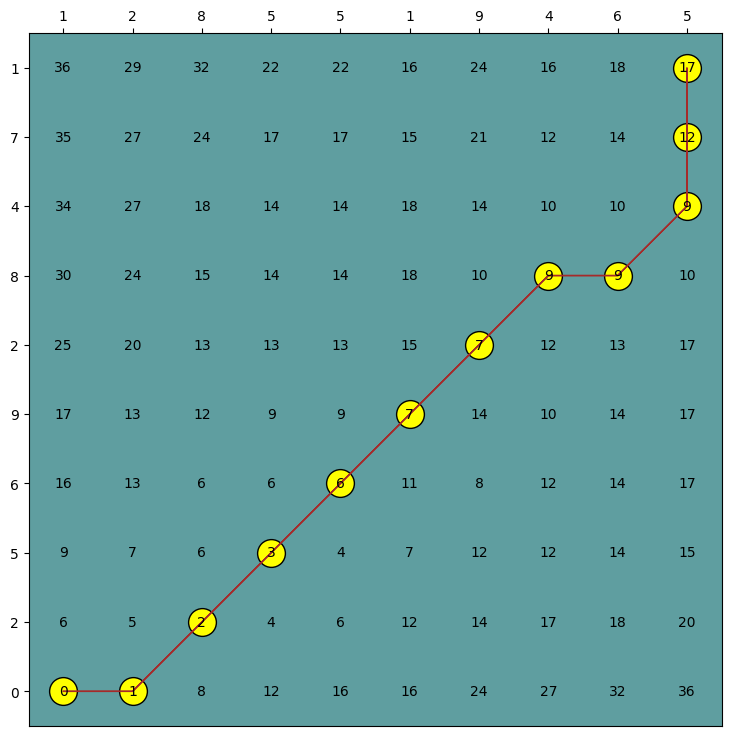

In [10]:
show_result_dtw(dp,path, series_1, series_2)